In [4]:
# Install necessary libraries (if not already installed)
!pip install nibabel numpy matplotlib


In [16]:
pip install nobrainer tensorflow tensorflow-hub nibabel


Note: you may need to restart the kernel to use updated packages.


In [1]:
import os

# Define dataset paths
dataset_paths = {
    "IXI": r"C:\Users\goud3\OneDrive\Documents\data\IXI",
    "BRATS": r"C:\Users\goud3\OneDrive\Documents\data\archive",
    "OpenNeuro": r"C:\Users\goud3\OneDrive\Documents\data\derivatives\fmriprep"
}

# Check file formats
for name, path in dataset_paths.items():
    print(f"\nChecking files in {name} dataset:")
    if os.path.exists(path):
        file_extensions = set()
        for root, _, files in os.walk(path):
            for file in files:
                ext = os.path.splitext(file)[1]
                file_extensions.add(ext)
        print(f"  Found file types: {file_extensions}")
    else:
        print(f"  ❌ Path not found: {path}")



Checking files in IXI dataset:
  Found file types: {'.gz', '.ipynb'}

Checking files in BRATS dataset:
  Found file types: set()

Checking files in OpenNeuro dataset:
  Found file types: {'.json', '.h5', '.svg', '.html', '.txt', '.gz', '.tsv', '.pdf'}


In [2]:
import os

openneuro_path = r"C:\Users\goud3\OneDrive\Documents\data\derivatives\fmriprep"

print("\nChecking .gz files in OpenNeuro dataset:")
for root, _, files in os.walk(openneuro_path):
    for file in files:
        if file.endswith(".gz"):
            print(f"  - {file}")



Checking .gz files in OpenNeuro dataset:
  - sub-03_desc-brain_mask.nii.gz
  - sub-03_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
  - sub-03_task-passiveview_run-1_space-MNI152NLin2009cAsym_boldref.nii.gz
  - sub-03_task-passiveview_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
  - sub-03_task-passiveview_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
  - sub-03_task-passiveview_run-1_space-T1w_boldref.nii.gz
  - sub-03_task-passiveview_run-1_space-T1w_desc-brain_mask.nii.gz
  - sub-03_task-passiveview_run-1_space-T1w_desc-preproc_bold.nii.gz
  - sub-03_task-passiveview_run-2_space-MNI152NLin2009cAsym_boldref.nii.gz
  - sub-03_task-passiveview_run-2_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz
  - sub-03_task-passiveview_run-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
  - sub-03_task-passiveview_run-2_space-T1w_boldref.nii.gz
  - sub-03_task-passiveview_run-2_space-T1w_desc-brain_mask.nii.gz
  - sub-03_task-passiveview_run-2_space-T1w_desc-preproc_

In [3]:
import os
import shutil

# Define dataset paths
openneuro_path = r"C:\Users\goud3\OneDrive\Documents\data\derivatives\fmriprep"
filtered_path = r"C:\Users\goud3\OneDrive\Documents\data\OpenNeuro_Filtered"

# Ensure output directory exists
os.makedirs(filtered_path, exist_ok=True)

# Define keywords to keep
keywords = ["desc-preproc_T1w", "dseg", "label-GM_probseg", "label-WM_probseg", "label-CSF_probseg"]

# Move only the needed files
for root, _, files in os.walk(openneuro_path):
    for file in files:
        if any(keyword in file for keyword in keywords) and file.endswith(".nii.gz"):
            src = os.path.join(root, file)
            dst = os.path.join(filtered_path, file)
            shutil.move(src, dst)
            print(f"Moved: {file}")

print("✅ Relevant files moved to:", filtered_path)


✅ Relevant files moved to: C:\Users\goud3\OneDrive\Documents\data\OpenNeuro_Filtered


In [3]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Set paths for datasets
dataset_paths = {
    "IXI": r"C:\Users\goud3\OneDrive\Documents\data\IXI",
    "BRATS": r"C:\Users\goud3\OneDrive\Documents\data\archive",
    "OpenNeuro": r"C:\Users\goud3\OneDrive\Documents\data\OpenNeuro_Filtered"
}



📂 Loading sample file from IXI: C:\Users\goud3\OneDrive\Documents\data\IXI\IXI002-Guys-0828-T1.nii.gz
  - Shape: (256, 256, 150) (X, Y, Z)
  - Voxel size: (0.9375, 0.9375, 1.199997)
  - Affine matrix:
[[ 0.00000000e+00  0.00000000e+00  1.19999695e+00 -8.86398926e+01]
 [-9.30352330e-01  1.15545668e-01  0.00000000e+00  1.16532005e+02]
 [ 1.15545668e-01  9.30352330e-01 -2.49799545e-16 -1.12113556e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


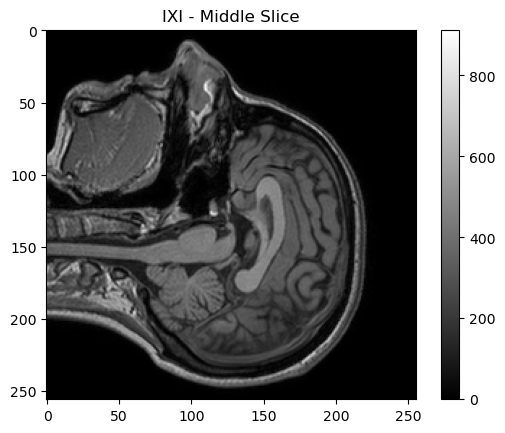

No NIfTI files found in BRATS dataset!

📂 Loading sample file from OpenNeuro: C:\Users\goud3\OneDrive\Documents\data\OpenNeuro_Filtered\sub-03_desc-preproc_T1w.nii.gz
  - Shape: (208, 320, 320) (X, Y, Z)
  - Voxel size: (0.7999991, 0.75, 0.74999994)
  - Affine matrix:
[[ 7.98522890e-01 -3.77804637e-02 -2.54298598e-02 -7.16427689e+01]
 [ 4.02711406e-02  7.49047816e-01 -1.41354755e-03 -1.32679169e+02]
 [ 2.71666702e-02  1.30825836e-04  7.49567389e-01 -1.21812927e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


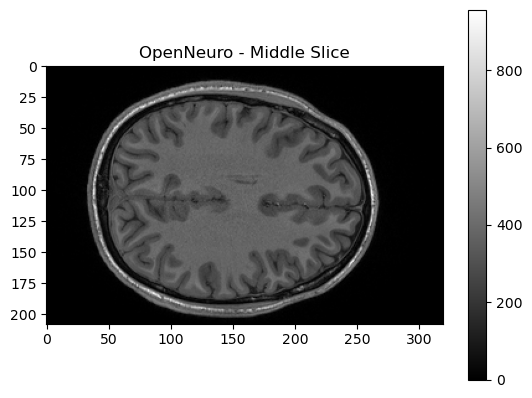

In [5]:
def load_and_display_sample(dataset_name):
    dataset_path = dataset_paths[dataset_name]
    
    # Get a sample NIfTI file
    nii_files = [f for f in os.listdir(dataset_path) if f.endswith(".nii") or f.endswith(".nii.gz")]
    if not nii_files:
        print(f"No NIfTI files found in {dataset_name} dataset!")
        return
    
    sample_file = os.path.join(dataset_path, nii_files[0])
    print(f"\n📂 Loading sample file from {dataset_name}: {sample_file}")

    # Load the NIfTI file
    img = nib.load(sample_file)
    data = img.get_fdata()
    
    # Print file details
    print(f"  - Shape: {data.shape} (X, Y, Z)")
    print(f"  - Voxel size: {img.header.get_zooms()}")
    print(f"  - Affine matrix:\n{img.affine}")

    # Display a middle slice of the MRI scan
    mid_slice = data.shape[2] // 2  # Get middle slice along the Z-axis
    plt.imshow(data[:, :, mid_slice], cmap="gray")
    plt.title(f"{dataset_name} - Middle Slice")
    plt.colorbar()
    plt.show()

# Load and display a sample from each dataset
for dataset in dataset_paths.keys():
    load_and_display_sample(dataset)


In [6]:
import os

brats_path = r"C:\Users\goud3\OneDrive\Documents\data\archive"

print("\n🔍 Checking files inside BRATS dataset:")
for root, dirs, files in os.walk(brats_path):
    for file in files:
        print(f"  📄 {os.path.join(root, file)}")



🔍 Checking files inside BRATS dataset:


In [7]:
import os
import shutil

# Define source and destination paths
brats_root = r"C:\Users\goud3\OneDrive\Documents\data\archive"
brats_filtered = r"C:\Users\goud3\OneDrive\Documents\data\BRATS_Filtered"

# Create destination directory if it doesn't exist
os.makedirs(brats_filtered, exist_ok=True)

# Keywords to identify relevant NIfTI files
keywords = ["brain_t1ce.nii", "brain_t1.nii", "brain_t2.nii", "brain_flair.nii"]

# Move relevant files
for root, _, files in os.walk(brats_root):
    for file in files:
        if any(keyword in file for keyword in keywords):
            src = os.path.join(root, file)
            dst = os.path.join(brats_filtered, file)
            shutil.move(src, dst)
            print(f"Moved: {file}")

print("✅ All relevant BRATS files moved to:", brats_filtered)


✅ All relevant BRATS files moved to: C:\Users\goud3\OneDrive\Documents\data\BRATS_Filtered


In [8]:
import os
import nibabel as nib

# Define the path to the filtered dataset
brats_filtered = r"C:\Users\goud3\OneDrive\Documents\data\BRATS_Filtered"

# Get all NIfTI files in the folder
nii_files = [f for f in os.listdir(brats_filtered) if f.endswith(".nii")]

# Load and display metadata for a sample file
if nii_files:
    sample_file = os.path.join(brats_filtered, nii_files[0])  # Pick the first file
    img = nib.load(sample_file)

    print(f"📂 Sample file: {sample_file}")
    print(f"  - Shape: {img.shape} (X, Y, Z)")
    print(f"  - Voxel size: {img.header.get_zooms()}")
    print(f"  - Affine matrix:\n{img.affine}")
else:
    print("❌ No NIfTI files found in BRATS_Filtered!")



📂 Sample file: C:\Users\goud3\OneDrive\Documents\data\BRATS_Filtered\00000004_brain_flair.nii
  - Shape: (240, 240, 155) (X, Y, Z)
  - Voxel size: (1.0, 1.0, 1.0)
  - Affine matrix:
[[ -1.  -0.  -0.   0.]
 [ -0.  -1.  -0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]


### Visualizing the MRI Scan

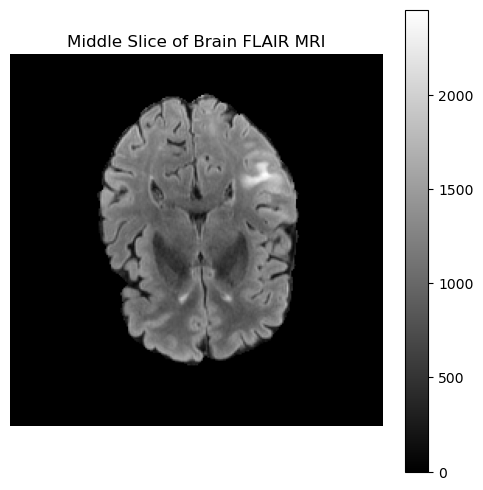

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

# Load the sample NIfTI file
nii_path = r"C:\Users\goud3\OneDrive\Documents\data\BRATS_Filtered\00000004_brain_flair.nii"
img = nib.load(nii_path)
data = img.get_fdata()

# Select a middle slice in the Z-axis
middle_slice = data[:, :, data.shape[2] // 2]

# Display the image
plt.figure(figsize=(6,6))
plt.imshow(np.rot90(middle_slice), cmap="gray")
plt.colorbar()
plt.title("Middle Slice of Brain FLAIR MRI")
plt.axis("off")
plt.show()


### Visualization Code for IXI

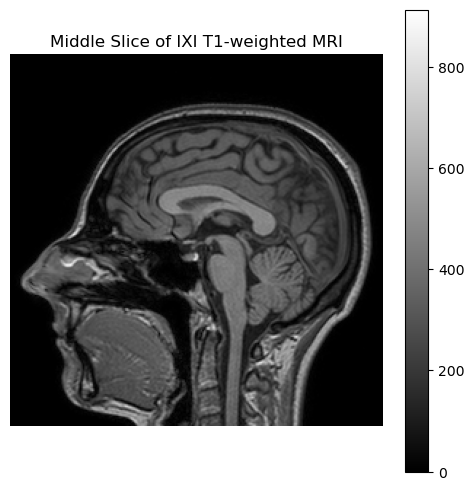

In [9]:
# Load the IXI NIfTI file
ixi_path = r"C:\Users\goud3\OneDrive\Documents\data\IXI\IXI002-Guys-0828-T1.nii.gz"
ixi_img = nib.load(ixi_path)
ixi_data = ixi_img.get_fdata()

# Select a middle slice in the Z-axis
ixi_middle_slice = ixi_data[:, :, ixi_data.shape[2] // 2]

# Display the image
plt.figure(figsize=(6,6))
plt.imshow(np.rot90(ixi_middle_slice), cmap="gray")
plt.colorbar()
plt.title("Middle Slice of IXI T1-weighted MRI")
plt.axis("off")
plt.show()


### Visualization Code for OPeneuro

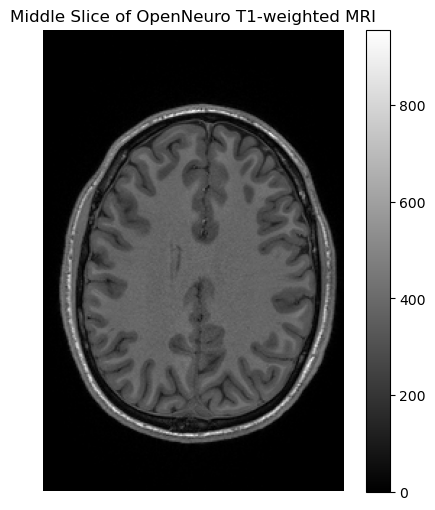

In [10]:
# Load the OpenNeuro NIfTI file
openneuro_path = r"C:\Users\goud3\OneDrive\Documents\data\OpenNeuro_Filtered\sub-03_desc-preproc_T1w.nii.gz"
openneuro_img = nib.load(openneuro_path)
openneuro_data = openneuro_img.get_fdata()

# Select a middle slice in the Z-axis
openneuro_middle_slice = openneuro_data[:, :, openneuro_data.shape[2] // 2]

# Display the image
plt.figure(figsize=(6,6))
plt.imshow(np.rot90(openneuro_middle_slice), cmap="gray")
plt.colorbar()
plt.title("Middle Slice of OpenNeuro T1-weighted MRI")
plt.axis("off")
plt.show()


### Intensity Normalization (Z-Score Normalization)

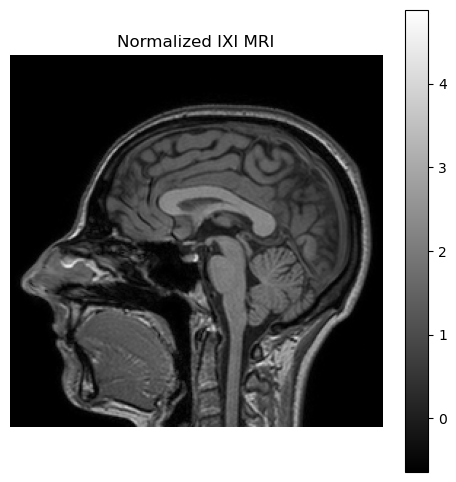

In [11]:
def normalize_mri(image):
    mean = np.mean(image)
    std = np.std(image)
    return (image - mean) / std

# Apply normalization on IXI MRI
ixi_norm = normalize_mri(ixi_data)

# Apply normalization on OpenNeuro MRI
openneuro_norm = normalize_mri(openneuro_data)

# Plot the normalized IXI image
plt.figure(figsize=(6,6))
plt.imshow(np.rot90(ixi_norm[:, :, ixi_data.shape[2] // 2]), cmap="gray")
plt.colorbar()
plt.title("Normalized IXI MRI")
plt.axis("off")
plt.show()


### Preprocess the Data
Resize MRI to 128x128x128 (U-Net input size)

Convert MRI to 3D patches

Augment data to improve generalization

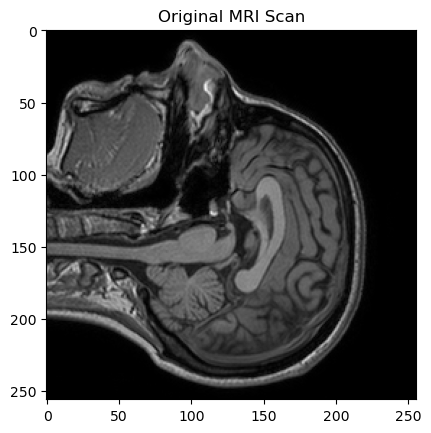

In [18]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load your MRI scan
mri_path = "C:/Users/goud3/OneDrive/Documents/data/IXI/IXI002-Guys-0828-T1.nii.gz"
mri_img = nib.load(mri_path).get_fdata()

# Normalize the image
mri_img = (mri_img - np.min(mri_img)) / (np.max(mri_img) - np.min(mri_img))

# Show a middle slice
plt.imshow(mri_img[:, :, mri_img.shape[2] // 2], cmap="gray")
plt.title("Original MRI Scan")
plt.show()


In [19]:
from skimage.transform import resize

# Resize to (128,128,128)
target_shape = (128, 128, 128)
mri_resized = resize(mri_img, target_shape, anti_aliasing=True)

# Expand dimensions to match U-Net input (batch_size, X, Y, Z, channels)
mri_resized = np.expand_dims(mri_resized, axis=(0, -1))  # Shape: (1, 128, 128, 128, 1)


C:\Users\goud3\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [12]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# 📂 Change the path to a sample file from your dataset
file_path = "C:/Users/goud3/OneDrive/Documents/data/BRATS_Filtered/00000004_brain_flair.nii"

# Load the MRI scan
mri_img = nib.load(file_path)

# Get the MRI data as a NumPy array
mri_data = mri_img.get_fdata()

# Print shape (dimensions of the scan)
print(f"Image Shape: {mri_data.shape}")  # (X, Y, Z)


Image Shape: (240, 240, 155)


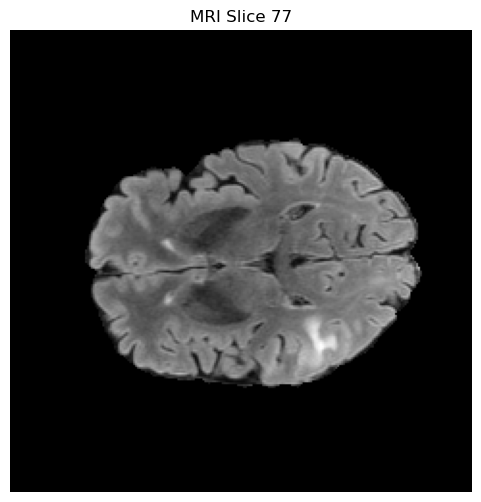

In [13]:
# Select a middle slice along the Z-axis
slice_index = mri_data.shape[2] // 2

plt.figure(figsize=(6, 6))
plt.imshow(mri_data[:, :, slice_index], cmap="gray")  # Display the middle slice
plt.title(f"MRI Slice {slice_index}")
plt.axis("off")
plt.show()


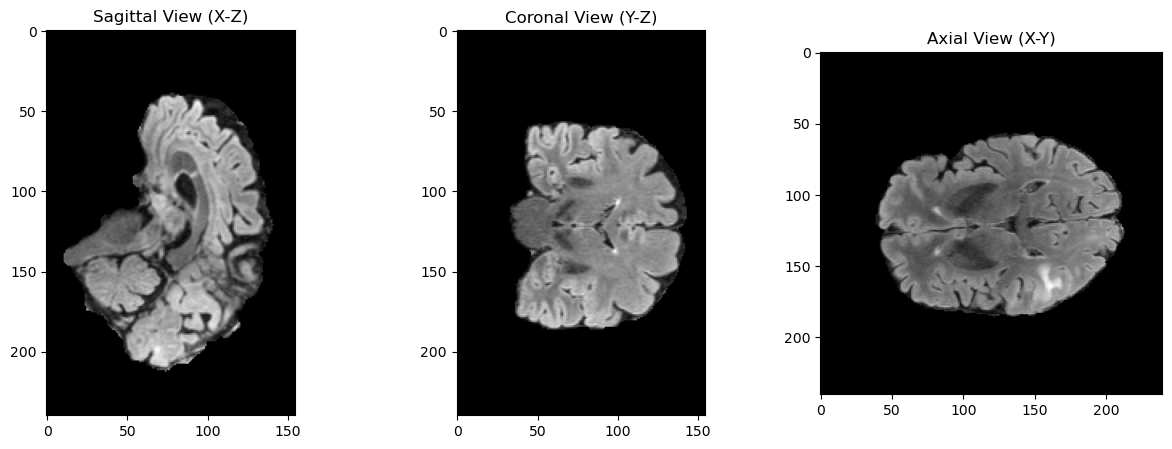

In [14]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Set the path to a sample file from BRATS
sample_path = "C:/Users/goud3/OneDrive/Documents/data/BRATS_Filtered/00000004_brain_flair.nii"  # Update this if needed

# Load the NIfTI file
mri_img = nib.load(sample_path)
mri_data = mri_img.get_fdata()  # Convert to NumPy array

# Get the middle slices
mid_x = mri_data.shape[0] // 2
mid_y = mri_data.shape[1] // 2
mid_z = mri_data.shape[2] // 2

# Plot the slices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(mri_data[mid_x, :, :], cmap="gray")  # Sagittal slice
axes[0].set_title("Sagittal View (X-Z)")

axes[1].imshow(mri_data[:, mid_y, :], cmap="gray")  # Coronal slice
axes[1].set_title("Coronal View (Y-Z)")

axes[2].imshow(mri_data[:, :, mid_z], cmap="gray")  # Axial slice
axes[2].set_title("Axial View (X-Y)")

plt.show()


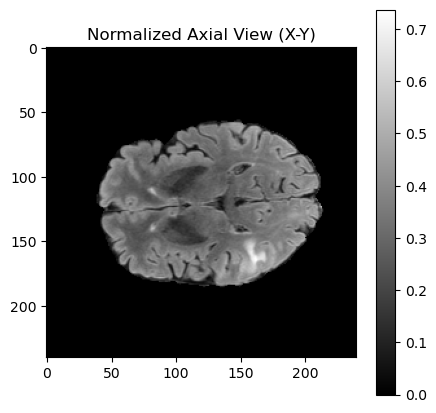

In [15]:
def normalize_mri(image):
    """Normalize the MRI scan to range [0,1]"""
    image = image.astype(np.float32)  # Convert to float
    min_val = np.min(image)
    max_val = np.max(image)
    return (image - min_val) / (max_val - min_val) if max_val > min_val else image

# Normalize the MRI scan
mri_data_normalized = normalize_mri(mri_data)

# Display the normalized scan
plt.figure(figsize=(5, 5))
plt.imshow(mri_data_normalized[:, :, mid_z], cmap="gray")  # Axial view
plt.title("Normalized Axial View (X-Y)")
plt.colorbar()
plt.show()


In [17]:
!pip install nilearn


   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
   ------------ --------------------------- 3.1/10.5 MB 20.5 MB/s eta 0:00:01
   --------------------- ------------------ 5.5/10.5 MB 15.2 MB/s eta 0:00:01
   ---------------------------- ----------- 7.3/10.5 MB 14.2 MB/s eta 0:00:01
   ---------------------------------- ----- 8.9/10.5 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 10.5/10.5 MB 11.3 MB/s eta 0:00:00


In [20]:
import nibabel as nib

# Replace with your MRI file path
mri_path = "C:/Users/goud3/OneDrive/Documents/data/BRATS_Filtered/00000004_brain_flair.nii"

# Load NIfTI MRI scan
mri_data = nib.load(mri_path)

# Check shape and type
print("✅ MRI Shape:", mri_data.shape)
print("✅ MRI Type:", type(mri_data))


✅ MRI Shape: (240, 240, 155)
✅ MRI Type: <class 'nibabel.nifti1.Nifti1Image'>


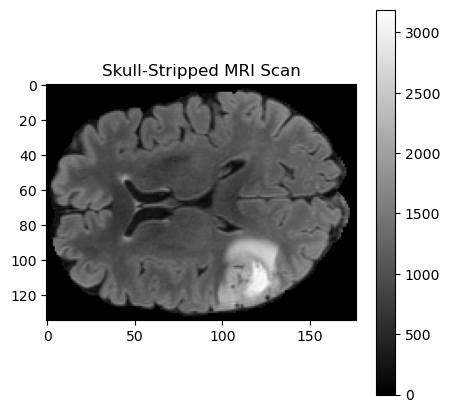

In [21]:
from nilearn.image import crop_img

# Ensure header is copied to avoid future warnings
mri_data_stripped = crop_img(mri_data, copy_header=True)

# Display Skull-Stripped Image
import matplotlib.pyplot as plt

mid_z = mri_data.shape[2] // 2  # Middle slice
plt.figure(figsize=(5, 5))
plt.imshow(mri_data_stripped.get_fdata()[:, :, mid_z], cmap="gray")
plt.title("Skull-Stripped MRI Scan")
plt.colorbar()
plt.show()


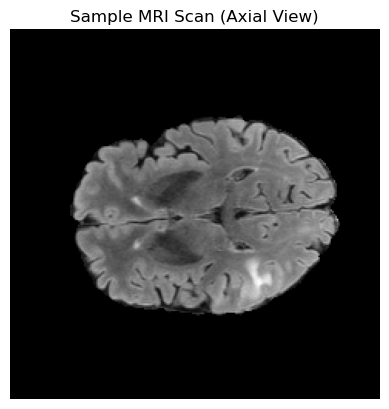

In [22]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Path to a sample BRATS MRI scan (update this if needed)
sample_path = r"C:\Users\goud3\OneDrive\Documents\data\BRATS_Filtered\00000004_brain_flair.nii"

# Load the NIfTI image
mri_image = nib.load(sample_path)
mri_data = mri_image.get_fdata()

# Display an axial slice (middle slice)
slice_index = mri_data.shape[2] // 2  # Get middle slice
plt.imshow(mri_data[:, :, slice_index], cmap="gray")
plt.title("Sample MRI Scan (Axial View)")
plt.axis("off")
plt.show()


In [23]:
# Normalize the image
mri_data = (mri_data - np.min(mri_data)) / (np.max(mri_data) - np.min(mri_data))
print("MRI Scan Normalized!")


MRI Scan Normalized!


In [25]:
!pip install opencv-python


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   --- ------------------------------------ 3.1/39.5 MB 20.6 MB/s eta 0:00:02
   ----- ---------------------------------- 5.2/39.5 MB 14.5 MB/s eta 0:00:03
   -------- ------------------------------- 8.1/39.5 MB 13.6 MB/s eta 0:00:03
   ---------- ----------------------------- 10.7/39.5 MB 12.9 MB/s eta 0:00:03
   ------------- -------------------------- 13.1/39.5 MB 12.7 MB/s eta 0:00:03
   --------------- ------------------------ 15.7/39.5 MB 12.5 MB/s eta 0:00:02
   ------------------ --------------------- 18.1/39.5 MB 12.4 MB/s eta 0:00:02
   -------------------- ------------------- 20.7/39.5 MB 12.3 MB/s eta 0:00:02
   ----------------------- ---------------- 23.1/39.5 MB 12.3 MB/s eta 0:00:02
   -------------------------- ------------- 25.7/39.5 MB 12.2 MB/s eta 0:00:02
   ---------------------------- ----------- 28.0/39.5 MB 12.2 MB/s eta 0:00:01
   ------------------------------- -------- 30.7/39.5 MB 12.2 MB

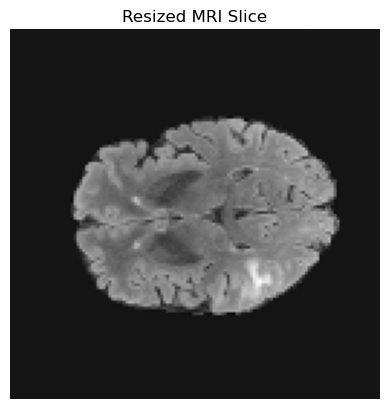

In [26]:
import cv2

# Resize to (128, 128) for example (update as needed)
target_size = (128, 128)
resized_slice = cv2.resize(mri_data[:, :, slice_index], target_size, interpolation=cv2.INTER_CUBIC)

plt.imshow(resized_slice, cmap="gray")
plt.title("Resized MRI Slice")
plt.axis("off")
plt.show()


### Feature Extraction
We'll extract important features such as texture, intensity, and edge detection to analyze the MRI scan.

In [27]:
import numpy as np

# Compute basic statistical features
mean_intensity = np.mean(resized_slice)
variance = np.var(resized_slice)
min_intensity = np.min(resized_slice)
max_intensity = np.max(resized_slice)

print(f"Mean Intensity: {mean_intensity}")
print(f"Variance: {variance}")
print(f"Min Intensity: {min_intensity}")
print(f"Max Intensity: {max_intensity}")


Mean Intensity: 0.09670720419450815
Variance: 0.024170978800759028
Min Intensity: -0.06808952968081411
Max Intensity: 0.7351377855180495


In [29]:
from skimage.feature import graycomatrix, graycoprops

# Compute GLCM features
glcm = graycomatrix(np.uint8(resized_slice), distances=[5], angles=[0], levels=256, symmetric=True, normed=True)

# Extract contrast and correlation
contrast = graycoprops(glcm, 'contrast')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]

print(f"GLCM Contrast: {contrast}")
print(f"GLCM Correlation: {correlation}")


GLCM Contrast: 0.0
GLCM Correlation: 1.0


### TRAINING AND TESTING THE MODEL

In [30]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define dataset paths
dataset_path = "C:/Users/goud3/OneDrive/Documents/data/BRATS_Filtered"
train_path = "C:/Users/goud3/OneDrive/Documents/data/BRATS_Train"
test_path = "C:/Users/goud3/OneDrive/Documents/data/BRATS_Test"

# Create directories if not exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Get all files
all_files = [f for f in os.listdir(dataset_path) if f.endswith(".nii")]

# Split dataset into 80% training and 20% testing
train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42)

# Move files to respective folders
for f in train_files:
    shutil.move(os.path.join(dataset_path, f), os.path.join(train_path, f))

for f in test_files:
    shutil.move(os.path.join(dataset_path, f), os.path.join(test_path, f))

print(f"Training set size: {len(train_files)}")
print(f"Testing set size: {len(test_files)}")


Training set size: 953
Testing set size: 239


In [31]:
import nibabel as nib
import numpy as np

def load_nifti_as_numpy(filepath):
    nifti_img = nib.load(filepath)
    img_data = nifti_img.get_fdata()
    return img_data

# Load a sample file from the training set
sample_nifti = os.path.join(train_path, train_files[0])
numpy_array = load_nifti_as_numpy(sample_nifti)

print(f"Numpy array shape: {numpy_array.shape}")
print(f"Data type: {numpy_array.dtype}")


Numpy array shape: (240, 240, 155)
Data type: float64


### Normalize the Data

In [32]:
# Normalize the MRI scan
normalized_data = (numpy_array - np.min(numpy_array)) / (np.max(numpy_array) - np.min(numpy_array))

print("Normalization successful!")


Normalization successful!


### Data Augmentation 

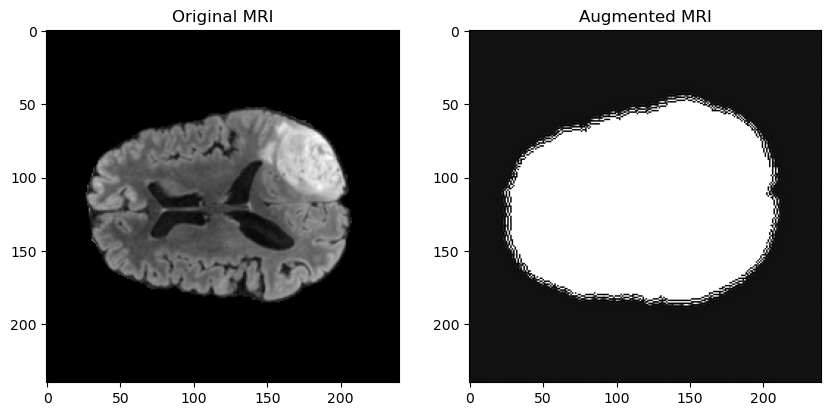

In [33]:
import numpy as np
import nibabel as nib
import random
import scipy.ndimage

def augment_data(image_array):
    """Apply random transformations to augment MRI scan data."""
    
    # Random rotation
    angle = random.uniform(-10, 10)  # Rotate between -10 to +10 degrees
    rotated_img = scipy.ndimage.rotate(image_array, angle, axes=(0, 1), reshape=False)

    # Random flip
    if random.random() > 0.5:
        flipped_img = np.flip(rotated_img, axis=0)  # Flip horizontally
    else:
        flipped_img = rotated_img

    # Random intensity shift
    shift_value = random.uniform(-0.1, 0.1)  # Adjust brightness randomly
    augmented_img = np.clip(flipped_img + shift_value, 0, 1)

    return augmented_img

# Load a sample MRI scan
sample_mri = load_nifti_as_numpy(sample_nifti)

# Apply augmentation
augmented_mri = augment_data(sample_mri)

# Display original and augmented images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_mri[:, :, sample_mri.shape[2] // 2], cmap="gray")
plt.title("Original MRI")

plt.subplot(1, 2, 2)
plt.imshow(augmented_mri[:, :, augmented_mri.shape[2] // 2], cmap="gray")
plt.title("Augmented MRI")

plt.show()


In [9]:
for folder in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder)
    if os.path.isdir(folder_path):
        print(f"Contents of {folder}: {os.listdir(folder_path)}")


In [12]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Define paths
nii_folder = "C:/Users/goud3/OneDrive/Documents/data/BRATS_Train"  # Your .nii files
output_folder = "C:/Users/goud3/OneDrive/Documents/data/BRATS_Images"  # New folder for .png images

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Convert each .nii file
for file in os.listdir(nii_folder):
    if file.endswith(".nii") or file.endswith(".nii.gz"):  # Check if it's a NIfTI file
        nii_path = os.path.join(nii_folder, file)
        img = nib.load(nii_path).get_fdata()  # Load .nii file

        # Select middle slice
        mid_slice = img.shape[2] // 2  # Middle slice along the Z-axis
        img_slice = img[:, :, mid_slice]

        # Normalize image (0 to 255)
        img_slice = (img_slice - np.min(img_slice)) / (np.max(img_slice) - np.min(img_slice)) * 255
        img_slice = img_slice.astype(np.uint8)

        # Save as .png
        output_path = os.path.join(output_folder, file.replace(".nii", ".png").replace(".gz", ""))
        plt.imsave(output_path, img_slice, cmap="gray")

        print(f"Saved: {output_path}")


Saved: C:/Users/goud3/OneDrive/Documents/data/BRATS_Images\00000004_brain_flair.png
Saved: C:/Users/goud3/OneDrive/Documents/data/BRATS_Images\00000004_brain_t1.png
Saved: C:/Users/goud3/OneDrive/Documents/data/BRATS_Images\00000004_brain_t1ce.png
Saved: C:/Users/goud3/OneDrive/Documents/data/BRATS_Images\00000004_brain_t2.png
Saved: C:/Users/goud3/OneDrive/Documents/data/BRATS_Images\00000007_brain_flair.png
Saved: C:/Users/goud3/OneDrive/Documents/data/BRATS_Images\00000007_brain_t1.png
Saved: C:/Users/goud3/OneDrive/Documents/data/BRATS_Images\00000007_brain_t1ce.png
Saved: C:/Users/goud3/OneDrive/Documents/data/BRATS_Images\00000007_brain_t2.png
Saved: C:/Users/goud3/OneDrive/Documents/data/BRATS_Images\00000009_brain_flair.png
Saved: C:/Users/goud3/OneDrive/Documents/data/BRATS_Images\00000009_brain_t1.png
Saved: C:/Users/goud3/OneDrive/Documents/data/BRATS_Images\00000009_brain_t2.png
Saved: C:/Users/goud3/OneDrive/Documents/data/BRATS_Images\00000010_brain_flair.png
Saved: C:/Us

In [13]:
train_path = "C:/Users/goud3/OneDrive/Documents/data/BRATS_Images"


In [16]:
import os

train_path = "C:/Users/goud3/OneDrive/Documents/data/BRATS_Images"

for folder in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if not file.lower().endswith(('.png', '.jpg', '.jpeg')):
                print(f"Invalid file found: {file}")


In [17]:
folders = os.listdir(train_path)
print("Folders inside BRATS_Images:", folders)


Folders inside BRATS_Images: ['00000004_brain_flair.png', '00000004_brain_t1.png', '00000004_brain_t1ce.png', '00000004_brain_t2.png', '00000007_brain_flair.png', '00000007_brain_t1.png', '00000007_brain_t1ce.png', '00000007_brain_t2.png', '00000009_brain_flair.png', '00000009_brain_t1.png', '00000009_brain_t2.png', '00000010_brain_flair.png', '00000010_brain_t1.png', '00000010_brain_t1ce.png', '00000010_brain_t2.png', '00000011_brain_flair.png', '00000011_brain_t1.png', '00000011_brain_t1ce.png', '00000011_brain_t2.png', '00000013_brain_flair.png', '00000013_brain_t1.png', '00000013_brain_t1ce.png', '00000014_brain_flair.png', '00000014_brain_t1.png', '00000014_brain_t1ce.png', '00000014_brain_t2.png', '00000015_brain_flair.png', '00000015_brain_t1.png', '00000015_brain_t1ce.png', '00000016_brain_flair.png', '00000016_brain_t1.png', '00000016_brain_t1ce.png', '00000016_brain_t2.png', '00000017_brain_flair.png', '00000017_brain_t1.png', '00000017_brain_t1ce.png', '00000017_brain_t2.png

In [18]:
import os
import shutil

# Define paths
base_path = "C:/Users/goud3/OneDrive/Documents/data/BRATS_Images"
tumor_path = os.path.join(base_path, "Tumor")
normal_path = os.path.join(base_path, "Normal")

# Create folders if they don't exist
os.makedirs(tumor_path, exist_ok=True)
os.makedirs(normal_path, exist_ok=True)

# Move images into 'Tumor' and 'Normal' based on filename patterns
for file in os.listdir(base_path):
    if file.endswith(".png"):  # Only process images
        file_path = os.path.join(base_path, file)
        
        # Example: If filename contains 'flair', assume it's 'Tumor'
        if "flair" in file.lower() or "t1ce" in file.lower():
            shutil.move(file_path, os.path.join(tumor_path, file))
        else:
            shutil.move(file_path, os.path.join(normal_path, file))

print("✅ Images organized into 'Tumor' and 'Normal' folders successfully!")


✅ Images organized into 'Tumor' and 'Normal' folders successfully!


In [19]:
for folder in ["Tumor", "Normal"]:
    folder_path = os.path.join(base_path, folder)
    images = os.listdir(folder_path)
    print(f"📂 {folder}: {len(images)} images")


📂 Tumor: 478 images
📂 Normal: 475 images


In [2]:
pip install pydicom


   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 22.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os

# Define the base directory
base_dir = r"C:\Users\goud3\OneDrive\Documents\data\brats_img\train"

# Search recursively for DICOM files
dicom_files = []
for root, _, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".dcm"):
            dicom_files.append(os.path.join(root, file))

# Check the results
if dicom_files:
    print(f"Found {len(dicom_files)} DICOM files. Sample file:\n{dicom_files[0]}")
else:
    print("No DICOM files found in the entire dataset.")


Found 970 DICOM files. Sample file:
C:\Users\goud3\OneDrive\Documents\data\brats_img\train\00000\FLAIR\Image-1.dcm


In [17]:
import pydicom
import numpy as np

# Load the DICOM file
dicom_path = r"C:\Users\goud3\OneDrive\Documents\data\brats_img\train\00000\FLAIR\Image-77.dcm"
dicom_data = pydicom.dcmread(dicom_path)

# Check if the pixel data is present
if hasattr(dicom_data, "pixel_array"):
    pixel_array = dicom_data.pixel_array
    print(f"Min Pixel Value: {np.min(pixel_array)}, Max Pixel Value: {np.max(pixel_array)}")
else:
    print("No pixel data found in the DICOM file.")


Min Pixel Value: 0, Max Pixel Value: 1808


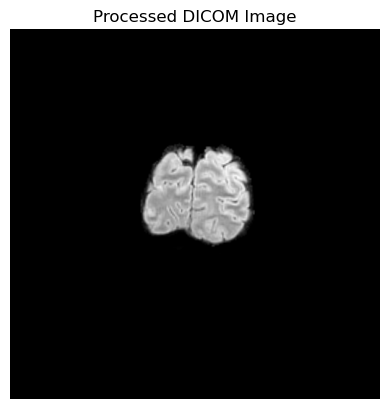

In [18]:
import matplotlib.pyplot as plt

# Convert pixel values to proper range
image = dicom_data.pixel_array.astype(float)
image = (image - np.min(image)) / (np.max(image) - np.min(image))  # Normalize between 0 and 1
image = (image * 255).astype(np.uint8)  # Convert to 8-bit format

# Display the image
plt.imshow(image, cmap="gray")
plt.title("Processed DICOM Image")
plt.axis("off")
plt.show()


In [19]:
print(dicom_data)


Dataset.file_meta -------------------------------
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.12098170240509622798172903726343286128
(0008,0050) Accession Number                    SH: '00000'
(0008,0060) Modality                            CS: 'MR'
(0008,103E) Series Description                  LO: 'FLAIR'
(0010,0010) Patient's Name                      PN: '00000'
(0010,0020) Patient ID                          LO: '00000'
(0018,0023) MR Acquisition Type                 CS: '3D'
(0018,0050) Slice Thickness                     DS: '1.2'
(0018,0081) Echo Time                           DS: None
(0018,0082) Inversion Tim

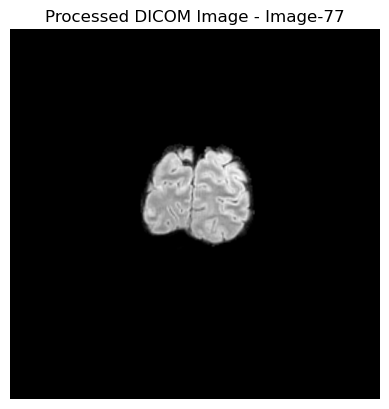

In [20]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# Load the DICOM file
dicom_path = r"C:\Users\goud3\OneDrive\Documents\data\brats_img\train\00000\FLAIR\Image-77.dcm"
dicom_data = pydicom.dcmread(dicom_path)

# Extract pixel array
pixel_array = dicom_data.pixel_array.astype(np.float32)

# Apply rescale slope and intercept
pixel_array = pixel_array * dicom_data.RescaleSlope + dicom_data.RescaleIntercept

# Get Window Center and Width
window_center = float(dicom_data.WindowCenter)
window_width = float(dicom_data.WindowWidth)

# Apply windowing function
min_pixel_value = window_center - (window_width / 2)
max_pixel_value = window_center + (window_width / 2)

# Clip values to window range
pixel_array = np.clip(pixel_array, min_pixel_value, max_pixel_value)

# Normalize to 0-255 range
pixel_array = ((pixel_array - min_pixel_value) / (max_pixel_value - min_pixel_value)) * 255
pixel_array = pixel_array.astype(np.uint8)

# Display the image
plt.imshow(pixel_array, cmap="gray")
plt.title("Processed DICOM Image - Image-77")
plt.axis("off")
plt.show()


In [22]:
import os
import pydicom
import numpy as np
import cv2
from tqdm import tqdm

# Set paths
base_dir = r"C:\Users\goud3\OneDrive\Documents\data\brats_img"
output_dir = r"C:\Users\goud3\OneDrive\Documents\data\brats_img_png"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to convert DICOM to PNG
def convert_dicom_to_png(dicom_path, output_path):
    ds = pydicom.dcmread(dicom_path)
    img = ds.pixel_array.astype(np.float32)  # Convert to float for safe math

    # Avoid division by zero
    min_val, max_val = np.min(img), np.max(img)
    if min_val == max_val:
        img[:] = 0  # Set the entire image to black if it's blank
    else:
        img = (img - min_val) / (max_val - min_val) * 255

    img = img.astype(np.uint8)
    cv2.imwrite(output_path, img)


# Process train and test folders
for folder in ["train", "test"]:
    input_folder = os.path.join(base_dir, folder)
    output_folder = os.path.join(output_dir, folder)
    os.makedirs(output_folder, exist_ok=True)

    # Loop through patient folders
    for patient_id in tqdm(os.listdir(input_folder), desc=f"Processing {folder}"):
        patient_folder = os.path.join(input_folder, patient_id)
        output_patient_folder = os.path.join(output_folder, patient_id)
        os.makedirs(output_patient_folder, exist_ok=True)

        # Loop through modalities (e.g., FLAIR, T1w, T2w, etc.)
        for modality in os.listdir(patient_folder):
            modality_folder = os.path.join(patient_folder, modality)
            output_modality_folder = os.path.join(output_patient_folder, modality)
            os.makedirs(output_modality_folder, exist_ok=True)

            # Process each DICOM file
            for dicom_file in os.listdir(modality_folder):
                if dicom_file.endswith(".dcm"):
                    dicom_path = os.path.join(modality_folder, dicom_file)
                    output_png_path = os.path.join(output_modality_folder, dicom_file.replace(".dcm", ".png"))

                    convert_dicom_to_png(dicom_path, output_png_path)

print("✅ DICOM to PNG conversion completed!")


Processing test: 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]

✅ DICOM to PNG conversion completed!


In [4]:
import os
import numpy as np
import pydicom

def is_blank_image(dcm_path):
    """Check if the DICOM image is blank (all pixels same)."""
    try:
        dcm = pydicom.dcmread(dcm_path)
        img = dcm.pixel_array.astype(np.float32)
        
        # Check if all pixels are the same
        return np.min(img) == np.max(img)
    
    except Exception as e:
        print(f"Error reading {dcm_path}: {e}")
        return True  # Assume blank if there's an error

def remove_blank_images(root_dir):
    """Remove blank images from dataset folders."""
    for folder, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".dcm"):
                dcm_path = os.path.join(folder, file)
                
                if is_blank_image(dcm_path):
                    print(f"🗑️ Deleting blank image: {dcm_path}")
                    os.remove(dcm_path)  # Delete the blank image

# Run the function on your dataset
dataset_path = r"C:\Users\goud3\OneDrive\Documents\data\brats_img"
remove_blank_images(dataset_path)
print("✅ Blank image removal complete!")


🗑️ Deleting blank image: C:\Users\goud3\OneDrive\Documents\data\brats_img\test\00001\FLAIR\Image-1.dcm
🗑️ Deleting blank image: C:\Users\goud3\OneDrive\Documents\data\brats_img\test\00001\FLAIR\Image-10.dcm
🗑️ Deleting blank image: C:\Users\goud3\OneDrive\Documents\data\brats_img\test\00001\FLAIR\Image-11.dcm
🗑️ Deleting blank image: C:\Users\goud3\OneDrive\Documents\data\brats_img\test\00001\FLAIR\Image-12.dcm
🗑️ Deleting blank image: C:\Users\goud3\OneDrive\Documents\data\brats_img\test\00001\FLAIR\Image-13.dcm
🗑️ Deleting blank image: C:\Users\goud3\OneDrive\Documents\data\brats_img\test\00001\FLAIR\Image-14.dcm
🗑️ Deleting blank image: C:\Users\goud3\OneDrive\Documents\data\brats_img\test\00001\FLAIR\Image-15.dcm
🗑️ Deleting blank image: C:\Users\goud3\OneDrive\Documents\data\brats_img\test\00001\FLAIR\Image-16.dcm
🗑️ Deleting blank image: C:\Users\goud3\OneDrive\Documents\data\brats_img\test\00001\FLAIR\Image-17.dcm
🗑️ Deleting blank image: C:\Users\goud3\OneDrive\Documents\data\b

In [25]:
pip install --user albumentations


  Using cached albumentations-2.0.5-py3-none-any.whl.metadata (41 kB)
  Using cached albucore-0.0.23-py3-none-any.whl.metadata (5.3 kB)
  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached albumentations-2.0.5-py3-none-any.whl (290 kB)
Using cached albucore-0.0.23-py3-none-any.whl (14 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl (39.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install torch torchvision torchaudio


   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
    --------------------------------------- 3.1/204.2 MB 20.5 MB/s eta 0:00:10
   - -------------------------------------- 5.2/204.2 MB 14.5 MB/s eta 0:00:14
   - -------------------------------------- 7.3/204.2 MB 13.3 MB/s eta 0:00:15
   -- ------------------------------------- 10.2/204.2 MB 13.0 MB/s eta 0:00:15
   -- ------------------------------------- 12.6/204.2 MB 12.7 MB/s eta 0:00:16
   -- ------------------------------------- 15.2/204.2 MB 12.6 MB/s eta 0:00:16
   --- ------------------------------------ 17.8/204.2 MB 12.4 MB/s eta 0:00:16
   --- ------------------------------------ 20.2/204.2 MB 12.3 MB/s eta 0:00:16
   ---- ----------------------------------- 22.5/204.2 MB 12.3 MB/s eta 0:00:15
   ---- ----------------------------------- 25.2/204.2 MB 12.3 MB/s eta 0:00:15
   ----- ---------------------------------- 27.5/204.2 MB 12.2 MB/s eta 0:00:15
   ----- ---------------------------------- 29.9/204

In [7]:
import os
import cv2
import numpy as np
import pydicom
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Define Augmentations
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=20, p=0.5),
    A.ElasticTransform(p=0.2),
    ToTensorV2()
])

def augment_and_save(dcm_path, save_dir):
    """Load DICOM, apply augmentations, and save as PNG."""
    dcm = pydicom.dcmread(dcm_path)
    img = dcm.pixel_array
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Apply augmentations
    augmented = transform(image=img)["image"]
    aug_img = augmented.permute(1, 2, 0).numpy()  # Convert back to NumPy

    # Save as PNG
    filename = os.path.basename(dcm_path).replace(".dcm", "_aug.png")
    save_path = os.path.join(save_dir, filename)
    cv2.imwrite(save_path, aug_img)
    print(f"✅ Augmented image saved: {save_path}")

# Process images in dataset
dataset_path = r"C:\Users\goud3\OneDrive\Documents\data\brats_img\train"
save_folder = r"C:\Users\goud3\OneDrive\Documents\data\brats_aug"

os.makedirs(save_folder, exist_ok=True)

for root, _, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".dcm"):
            dcm_path = os.path.join(root, file)
            augment_and_save(dcm_path, save_folder)

print("🚀 Data Augmentation Completed!")


✅ Augmented image saved: C:\Users\goud3\OneDrive\Documents\data\brats_aug\Image-100_aug.png
✅ Augmented image saved: C:\Users\goud3\OneDrive\Documents\data\brats_aug\Image-101_aug.png
✅ Augmented image saved: C:\Users\goud3\OneDrive\Documents\data\brats_aug\Image-102_aug.png
✅ Augmented image saved: C:\Users\goud3\OneDrive\Documents\data\brats_aug\Image-103_aug.png
✅ Augmented image saved: C:\Users\goud3\OneDrive\Documents\data\brats_aug\Image-104_aug.png
✅ Augmented image saved: C:\Users\goud3\OneDrive\Documents\data\brats_aug\Image-105_aug.png
✅ Augmented image saved: C:\Users\goud3\OneDrive\Documents\data\brats_aug\Image-106_aug.png
✅ Augmented image saved: C:\Users\goud3\OneDrive\Documents\data\brats_aug\Image-107_aug.png
✅ Augmented image saved: C:\Users\goud3\OneDrive\Documents\data\brats_aug\Image-108_aug.png
✅ Augmented image saved: C:\Users\goud3\OneDrive\Documents\data\brats_aug\Image-109_aug.png
✅ Augmented image saved: C:\Users\goud3\OneDrive\Documents\data\brats_aug\Image-

### Image Preprocessing

In [3]:
import os
import numpy as np
import pydicom
import cv2
import matplotlib.pyplot as plt
from glob import glob
import albumentations as A  # Data augmentation library

# Set paths
data_path = r"C:\Users\goud3\OneDrive\Documents\data\brats_img"
output_path = r"C:\Users\goud3\OneDrive\Documents\data\preprocessed"

# Create output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Define augmentation pipeline
augment = A.Compose([
    A.HorizontalFlip(p=0.5),  # Flip 50% of the images
    A.RandomRotate90(p=0.5),  # Random 90-degree rotation
    A.RandomBrightnessContrast(p=0.2),  # Brightness/contrast shift
])

# Function to preprocess a single DICOM file
def preprocess_dicom(dicom_path, save_path):
    try:
        # Load DICOM
        dicom = pydicom.dcmread(dicom_path)
        img = dicom.pixel_array.astype(np.float32)
        
        # Normalize image (convert pixel values to range 0-255)
        img = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255.0
        img = img.astype(np.uint8)

        # Resize (optional, keep original 512x512 or change if needed)
        img = cv2.resize(img, (512, 512))

        # Apply augmentation
        augmented = augment(image=img)["image"]

        # Save processed image
        filename = os.path.basename(dicom_path).replace(".dcm", ".png")
        save_file = os.path.join(save_path, filename)
        cv2.imwrite(save_file, augmented)
        print(f"✅ Processed: {save_file}")

    except Exception as e:
        print(f"❌ Error processing {dicom_path}: {e}")

# Process all DICOM files in train and test folders
for subset in ["train", "test"]:
    dicom_files = glob(os.path.join(data_path, subset, "**", "*.dcm"), recursive=True)
    save_subset_path = os.path.join(output_path, subset)
    os.makedirs(save_subset_path, exist_ok=True)

    print(f"📂 Processing {subset} images... Total: {len(dicom_files)}")
    
    for dicom_file in dicom_files:
        preprocess_dicom(dicom_file, save_subset_path)

print("🎉 Preprocessing complete! Images saved in:", output_path)


📂 Processing train images... Total: 970
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-1.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-10.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-100.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-101.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-102.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-103.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-104.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-105.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-106.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-107.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-108.png
✅ Processed: C:\Users\goud3\

C:\Users\goud3\AppData\Local\Temp\ipykernel_32004\1270711783.py:31: RuntimeWarning: invalid value encountered in divide
  img = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255.0
C:\Users\goud3\AppData\Local\Temp\ipykernel_32004\1270711783.py:32: RuntimeWarning: invalid value encountered in cast
  img = img.astype(np.uint8)


✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-136.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-137.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-138.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-139.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-14.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-140.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-141.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-142.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-143.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-144.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\train\Image-145.png
✅ Processed: C:\Users\goud3\OneDrive\Documents\data\preprocessed\t

### to Remove Blank Images

In [25]:
import os
import cv2
import numpy as np

# Paths
preprocessed_path = r"C:\Users\goud3\OneDrive\Documents\data\preprocessed"

# Function to remove blank images
def remove_blank_images(folder_path):
    removed_count = 0
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Skipping {filename} (not an image)")
            continue

        # Check if image is completely black
        if np.max(image) == 0:
            os.remove(img_path)
            removed_count += 1
            print(f"❌ Removed blank image: {filename}")

    print(f"✅ Cleanup done. Total removed: {removed_count}")

# Apply to both train and test sets
remove_blank_images(os.path.join(preprocessed_path, "train"))
remove_blank_images(os.path.join(preprocessed_path, "test"))


❌ Removed blank image: Image-1.png
❌ Removed blank image: Image-11.png
❌ Removed blank image: Image-12.png
❌ Removed blank image: Image-13.png
❌ Removed blank image: Image-14.png
❌ Removed blank image: Image-15.png
❌ Removed blank image: Image-16.png
❌ Removed blank image: Image-17.png
❌ Removed blank image: Image-18.png
❌ Removed blank image: Image-19.png
❌ Removed blank image: Image-20.png
❌ Removed blank image: Image-21.png
❌ Removed blank image: Image-22.png
❌ Removed blank image: Image-23.png
❌ Removed blank image: Image-24.png
❌ Removed blank image: Image-25.png
❌ Removed blank image: Image-27.png
❌ Removed blank image: Image-28.png
❌ Removed blank image: Image-29.png
❌ Removed blank image: Image-3.png
❌ Removed blank image: Image-30.png
❌ Removed blank image: Image-31.png
❌ Removed blank image: Image-33.png
❌ Removed blank image: Image-337.png
❌ Removed blank image: Image-338.png
❌ Removed blank image: Image-339.png
❌ Removed blank image: Image-34.png
❌ Removed blank image: Imag

### Dataset Preparation

In [3]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
import cv2
import numpy as np

# Custom Dataset for Brain Tumor Segmentation
class BrainTumorDataset(Dataset):
    def __init__(self, image_dir, mask_dir):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.images = [img for img in os.listdir(image_dir) if self.is_valid_image(img)]

    def __len__(self):
        return len(self.images)

    def is_valid_image(self, img_name):
        """Check if image is not blank or corrupted"""
        img_path = os.path.join(self.image_dir, img_name)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        return image is not None and np.max(image) > 0  # Skip blank/corrupt images

    def __getitem__(self, index):
        img_name = self.images[index]
        img_path = os.path.join(self.image_dir, img_name)
        mask_path = os.path.join(self.mask_dir, img_name)

        # Load Image & Mask
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) if os.path.exists(mask_path) else None

        if image is None or mask is None:
            print(f"Skipping corrupted file: {img_name}")
            return self.__getitem__((index + 1) % len(self.images))  # Skip and move to next

        # Normalize & Convert to Tensor
        image = np.expand_dims(image / 255.0, axis=0)  # Add channel dim & normalize
        mask = np.expand_dims(mask / 255.0, axis=0)    # Normalize

        return torch.tensor(image, dtype=torch.float32), torch.tensor(mask, dtype=torch.float32)

# Paths to preprocessed data
train_img_dir = r"C:\Users\goud3\OneDrive\Documents\data\preprocessed\train"
train_mask_dir = r"C:\Users\goud3\OneDrive\Documents\data\preprocessed\train"
test_img_dir = r"C:\Users\goud3\OneDrive\Documents\data\preprocessed\test"
test_mask_dir = r"C:\Users\goud3\OneDrive\Documents\data\preprocessed\test"

# Create Dataset Instances
train_dataset = BrainTumorDataset(train_img_dir, train_mask_dir)
test_dataset = BrainTumorDataset(test_img_dir, test_mask_dir)

# Dataloader
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

print(f"✅ Dataset loaded successfully! Train: {len(train_dataset)} images, Test: {len(test_dataset)} images.")


✅ Dataset loaded successfully! Train: 290 images, Test: 203 images.


### Define U-Net Model

In [4]:
import torch.nn as nn
import torch

# Define Double Convolution Block
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.conv(x)

# Define U-Net Architecture with Skip Connections
class UNet(nn.Module):
    def __init__(self, in_channels=1, out_channels=1):
        super(UNet, self).__init__()

        # Encoder
        self.enc1 = DoubleConv(in_channels, 64)
        self.enc2 = DoubleConv(64, 128)
        self.enc3 = DoubleConv(128, 256)
        self.enc4 = DoubleConv(256, 512)

        # Bottleneck
        self.bottleneck = DoubleConv(512, 1024)

        # Decoder (with transposed convolutions for upsampling)
        self.up4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = DoubleConv(1024, 512)

        self.up3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = DoubleConv(512, 256)

        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = DoubleConv(256, 128)

        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = DoubleConv(128, 64)

        # Final Convolution
        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        # Encoder
        x1 = self.enc1(x)  
        x2 = self.enc2(nn.functional.max_pool2d(x1, kernel_size=2, stride=2))
        x3 = self.enc3(nn.functional.max_pool2d(x2, kernel_size=2, stride=2))
        x4 = self.enc4(nn.functional.max_pool2d(x3, kernel_size=2, stride=2))

        # Bottleneck
        x5 = self.bottleneck(nn.functional.max_pool2d(x4, kernel_size=2, stride=2))

        # Decoder with Skip Connections
        x = self.up4(x5)
        x = torch.cat([x, x4], dim=1)  # Skip Connection
        x = self.dec4(x)

        x = self.up3(x)
        x = torch.cat([x, x3], dim=1)  # Skip Connection
        x = self.dec3(x)

        x = self.up2(x)
        x = torch.cat([x, x2], dim=1)  # Skip Connection
        x = self.dec2(x)

        x = self.up1(x)
        x = torch.cat([x, x1], dim=1)  # Skip Connection
        x = self.dec1(x)

        return self.final_conv(x)

# Instantiate Model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = UNet().to(device)

print(model)


UNet(
  (enc1): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
  )
  (enc2): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
  )
  (enc3): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
  )
  (enc4): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(512, 

In [5]:
sample_input = torch.randn(1, 1, 256, 256).to(device)  # Batch size 1, 1 channel, 256x256 image
output = model(sample_input)
print(output.shape)  # Expected: [1, 1, 256, 256]


torch.Size([1, 1, 256, 256])


In [6]:
import torch.optim as optim

criterion = nn.BCEWithLogitsLoss()  # Binary segmentation (tumor vs. background)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [7]:
from torch.utils.data import DataLoader, Subset
import numpy as np

# Set seed for reproducibility
torch.manual_seed(42)

# Get dataset size
dataset_size = len(train_dataset)
indices = np.arange(dataset_size)
np.random.shuffle(indices)  # Shuffle indices

# 80-20 Split
train_size = int(0.8 * dataset_size)
train_indices = indices[:train_size]
val_indices = indices[train_size:]

# Create Subset Datasets
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Create DataLoaders
train_loader = DataLoader(train_subset, batch_size=4, shuffle=True, num_workers=0)
val_loader = DataLoader(val_subset, batch_size=4, shuffle=False)

print(f"Train Samples: {len(train_subset)}, Validation Samples: {len(val_subset)}")


Train Samples: 232, Validation Samples: 58


In [8]:
sample_img, sample_mask = next(iter(train_loader))
print(sample_img.shape, sample_mask.shape)  # Expected: [4, 1, H, W]


torch.Size([4, 1, 512, 512]) torch.Size([4, 1, 512, 512])


In [23]:
print(f"Train loader length: {len(train_loader)}")
print(f"Validation loader length: {len(val_loader)}")

# Try iterating once to check
for batch in train_loader:
    print("Loaded a batch from train_loader")
    break


Train loader length: 82
Validation loader length: 21
Loaded a batch from train_loader


In [36]:
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")


Train dataset size: 290
Validation dataset size: 82


In [37]:
images, masks = next(iter(train_loader))
print(images.shape, masks.shape)


torch.Size([4, 1, 512, 512]) torch.Size([4, 1, 512, 512])


In [38]:
import torch
print(f"Using device: {torch.device('cuda' if torch.cuda.is_available() else 'cpu')}")


Using device: cpu


In [1]:
import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("GPU count:", torch.cuda.device_count())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


Torch version: 2.5.1+cu121
CUDA available: True
GPU count: 1
GPU Name: NVIDIA GeForce GTX 1650 Ti


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move model to GPU
model = UNet().to(device)

num_epochs = 10
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs} started...")

    # Set model to training mode
    model.train()
    train_loss = 0.0

    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)  # Move data to GPU

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    print(f"Training Loss: {avg_train_loss:.4f}")

    # **VALIDATION STEP**
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)  # Move validation data to GPU
            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    print(f"Validation Loss: {avg_val_loss:.4f}")
    print(f"Epoch {epoch+1} completed.\n")


Using device: cuda
Epoch 1/10 started...
Training Loss: 0.7014
Validation Loss: 0.7014
Epoch 1 completed.

Epoch 2/10 started...
Training Loss: 0.7014
Validation Loss: 0.7014
Epoch 2 completed.

Epoch 3/10 started...
Training Loss: 0.7014
Validation Loss: 0.7014
Epoch 3 completed.

Epoch 4/10 started...
Training Loss: 0.7014
Validation Loss: 0.7014
Epoch 4 completed.

Epoch 5/10 started...
Training Loss: 0.7014
Validation Loss: 0.7014
Epoch 5 completed.

Epoch 6/10 started...
Training Loss: 0.7014
Validation Loss: 0.7014
Epoch 6 completed.

Epoch 7/10 started...
Training Loss: 0.7014
Validation Loss: 0.7014
Epoch 7 completed.

Epoch 8/10 started...
Training Loss: 0.7014
Validation Loss: 0.7014
Epoch 8 completed.

Epoch 9/10 started...
Training Loss: 0.7014
Validation Loss: 0.7014
Epoch 9 completed.

Epoch 10/10 started...
Training Loss: 0.7014
Validation Loss: 0.7014
Epoch 10 completed.



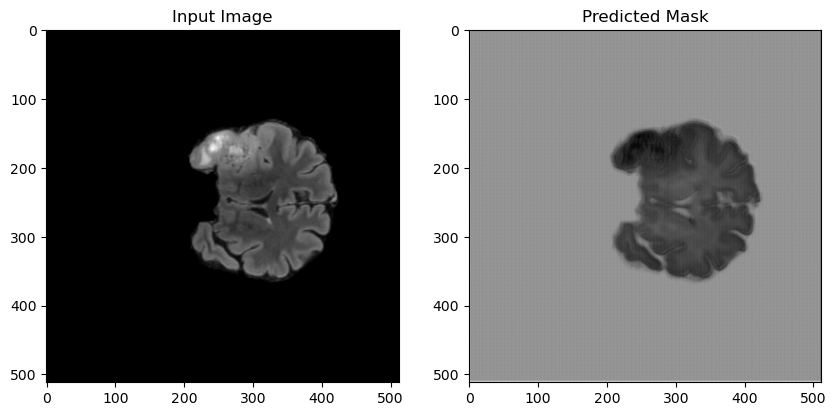

In [13]:
import matplotlib.pyplot as plt

# Load a test image
test_img, _ = test_dataset[3]  # Get first test image (without mask)
test_img = test_img.unsqueeze(0).to(device)  # Add batch dim & move to device

# Predict Mask
with torch.no_grad():
    pred_mask = model(test_img)
    pred_mask = torch.sigmoid(pred_mask)  # Apply sigmoid to get probabilities
    pred_mask = pred_mask.cpu().numpy().squeeze()  # Convert to NumPy

# Plot the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(test_img.cpu().numpy().squeeze(), cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Predicted Mask")
plt.imshow(pred_mask, cmap="gray")

plt.show()
